In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import math

# Load data

In [3]:
path = "/content/drive/MyDrive/ML/Final_Project/1. data_raw/"
data = pd.DataFrame()
for file in os.listdir(path):
    df = pd.read_excel(path+file)
    data = pd.concat([data, df])

In [4]:
data

,Rate,Review,Label
0,4.0,Mình thề là mình ko thể cảm nổi đồ ăn ở aeon m...,-1
1,3.8,Đôi khi thèm lên là bất chấp nắng nóng phi Và ...,-1
2,3.8,Ngõ treo biển cafe trứng đúng kiểu phố cổ hà n...,-1
3,3.8,Mình thấy địa chỉ cafe Giảng ở Nguyễn Hữu Huân...,-1
4,2.2,Mình là người Hà Nội và cũng cực kỳ khó tính t...,-1
...,...,...,...
6904,9.0,"Mình là khách hàng thường xuyên của quán, có t...",1
6905,7.2,Mình mới đến quán 1 lần và cảm thấy quán khá d...,1
6906,8.0,Quán ăn đồ Hàn mới mở ở gần trường mình nên bữ...,1
6907,10,Trà Sữa Dưa Lưới y như gu mình thích :))) Tuy ...,1


In [5]:
data.isna().sum()

Rate      0
Review    0
Label     0
dtype: int64

# Trực quan hóa

## 1. Thống kê lớp

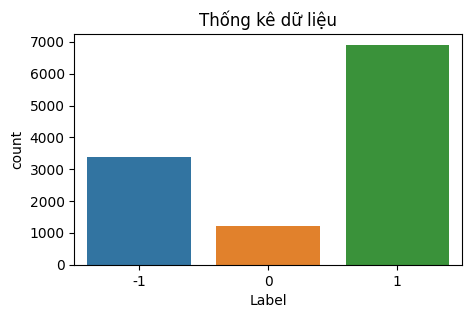

In [6]:
plt.figure(figsize=(5,3))
sb.countplot(data=data, x="Label").set_title('Thống kê dữ liệu')
plt.show()

In [7]:
data["Label"].value_counts()

 1    6909
-1    3377
 0    1201
Name: Label, dtype: int64

## 2. Thống kê từ trước khi tiền xử lí

In [8]:
def sentence_len(text):
  return len(text.split(' '));

df_len_headline = data["Review"].apply(lambda text: sentence_len(text))
print('Độ dài trung bình của bình luận trong bộ dữ liệu:', int(np.mean(df_len_headline)), 'từ')

Độ dài trung bình của bình luận trong bộ dữ liệu: 69 từ


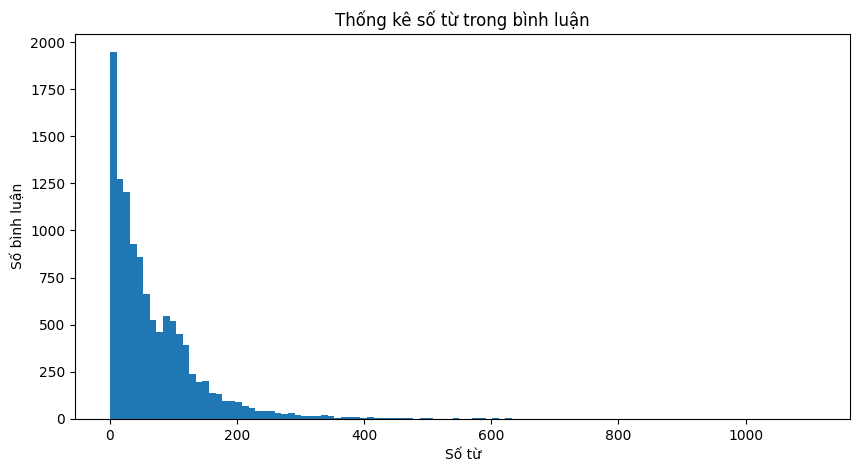

In [9]:
plt.figure(figsize=(10, 5))
plt.title("Thống kê số từ trong bình luận")
plt.xlabel('Số từ')
plt.ylabel('Số bình luận')
plt.hist(np.array(df_len_headline), bins=int(math.sqrt(len(df_len_headline))));

# Tiền xử lí

In [ ]:
!pip install underthesea

In [11]:
import regex as re
import underthesea

## 1. Xóa mẫu spam URL

In [12]:
def check_url(text):
    pattern = re.compile(r'(http|https)://[^\s]+')
    match = pattern.search(text)
    if match:
        return True
    else:
        return False

In [13]:
data.drop(data[data['Review'].apply(check_url)].index, inplace=True)
data.shape

(11481, 3)

## 2. Chuẩn hóa Unicode và dấu câu

In [14]:
from underthesea import text_normalize

uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"

# Hàm tạo dict để convert định dạng cũ sang định dạng mới
def loaddicchar():
  dic = {}
  char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split('|')
  charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split('|')
  for i in range(len(char1252)):
      dic[char1252[i]] = charutf8[i]
  return dic

dicchar = loaddicchar()

# Chuẩn hóa Unicode và dấu câu
def convert_unicode(txt):
    txt = re.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)
    return text_normalize(txt)

print(convert_unicode("Ðảm baỏ chất lựơng phòng thí nghịêm hoá học"))

Đảm bảo chất lượng phòng thí nghiệm hóa học


## 3. Đưa về dạng viết thường

In [15]:
def to_lower_case(sentence):
    sentence = sentence.lower()
    return sentence

## 4. Xóa các ký tự không cần thiết

In [16]:
def remove_unnecessary_charactor(document):
    # xóa các ký tự đặc biệt, emoji
    document = re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ_]',' ',document)
    # xóa kí tự chứa số
    document = re.sub(r'\w*\d\w*', '', document).strip()
    # xóa khoảng trắng thừa
    document = re.sub(r'\s+', ' ', document).strip()
    return document

document = 'Biết 1505 "là" gì không? 😆'
remove_unnecessary_charactor(document)

'Biết là gì không'

## 5. Tách từ tiếng Việt

In [17]:
from underthesea import word_tokenize

sentence = 'Xin chào, rất vui được làm quen, tôi đến từ đất nước Việt Nam!'
print(word_tokenize(sentence))
print(word_tokenize(sentence, format='text'))

['Xin', 'chào', ',', 'rất', 'vui', 'được', 'làm quen', ',', 'tôi', 'đến', 'từ', 'đất nước', 'Việt Nam', '!']
Xin chào , rất vui được làm_quen , tôi đến từ đất_nước Việt_Nam !


## 6. Chuẩn hóa những từ lặp âm tiết và viết tắt

In [24]:
def remove_duplicate_characters(text):
    pattern = re.compile(r'(\w)\1{2,}')
    text = pattern.sub(r'\1', text)
    return text

print(remove_duplicate_characters("Trà sữa ngon nhân viên bán hàng nhiệt tình! Likeeeeeee!"))

Trà sữa ngon nhân viên bán hàng nhiệt tình! Like!


In [ ]:
%cd /content
%rm -r /content/CS114
!git clone https://github.com/npk7264/CS114.git

In [30]:
replacements = {}
with open('/content/CS114/Final_project/code/abbreviations.txt', 'r') as file:
    for line in file:
        key, value = re.split(':', line, maxsplit=1)
        replacements[key] = value.strip()

def abbreviate(text):
    for key, value in replacements.items():
        text = re.sub(r'\b{}\b'.format(key), value, text)
    return(text)

## 7. Tổng hợp 1

In [32]:
def text_preprocessing(document):
  document = convert_unicode(document)
  document = to_lower_case(document)
  document = remove_unnecessary_charactor(document)
  document = word_tokenize(document, format='text')
  document = remove_duplicate_characters(document)
  document = re.sub(r'\s+', ' ', document).strip() # xóa khoảng trắng thừa
  document = abbreviate(document)
  return document

text_preprocessing('Xin chào, rất vui được làm quen, tôi đến từ đất nước Việt Nam! Oki, Theo nghị định đã ban hành, người dân cần ở trong nhà đến hết ngày 16/9.')

'xin chào rất vui được làm_quen tôi đến từ đất_nước việt nam ok theo nghị_định đã ban_hành người dân cần ở trong nhà đến hết ngày'

In [33]:
data["Preprocess_Review"] = data["Review"].apply(lambda x: text_preprocessing(x))
data

,Rate,Review,Label,Preprocess_Review
0,4.0,Mình thề là mình ko thể cảm nổi đồ ăn ở aeon m...,-1,mình thề là mình không thể cảm nổi đồ ăn ở aeo...
1,3.8,Đôi khi thèm lên là bất chấp nắng nóng phi Và ...,-1,đôi khi thèm lên là bất_chấp nắng nóng phi và ...
2,3.8,Ngõ treo biển cafe trứng đúng kiểu phố cổ hà n...,-1,ngõ treo biển cafe trứng đúng kiểu phố cổ hà_n...
3,3.8,Mình thấy địa chỉ cafe Giảng ở Nguyễn Hữu Huân...,-1,mình thấy địa_chỉ cafe giảng ở nguyễn_hữu_huân...
4,2.2,Mình là người Hà Nội và cũng cực kỳ khó tính t...,-1,mình là người hà_nội và cũng cực_kỳ khó_tính t...
...,...,...,...,...
6904,9.0,"Mình là khách hàng thường xuyên của quán, có t...",1,mình là khách_hàng thường_xuyên của quán có tu...
6905,7.2,Mình mới đến quán 1 lần và cảm thấy quán khá d...,1,mình mới đến quán lần và cảm_thấy quán khá dễ ...
6906,8.0,Quán ăn đồ Hàn mới mở ở gần trường mình nên bữ...,1,quán ăn đồ hàn mới mở ở gần trường mình nên bữ...
6907,10,Trà Sữa Dưa Lưới y như gu mình thích :))) Tuy ...,1,trà sữa dưa lưới y_như gu mình thích tuy vẫn c...


## 8. Loại bỏ stopword

Stopword là những từ thường xuyên xuất hiện trong văn nói, văn viết và không có quá nhiều ý nghĩa, đặc trưng cho bài toán phân loại cảm xúc trong câu. Ví dụ về stopword như: là, rằng, theo, thì, đó,...

### 8.1. Dùng stopword có sẵn từ github

In [ ]:
# %cd /content
# !git clone https://github.com/stopwords/vietnamese-stopwords.git

In [ ]:
# sw1 = open('/content/vietnamese-stopwords/vietnamese-stopwords-dash.txt')
# sw1 = sw1.readlines()
# sw1 = [x.strip() for x in sw1]

In [ ]:
# def remove_stopwords(document):
#   words = document.split(' ')
#   res = list()
#   for word in words:
#     if word not in stopwords:
#       res.append(word)

#   return ' '.join(res)

# remove_stopwords('theo nghị định đã ban hành, người dân cũng_nên ở trong nhà đến hết ngày 16/9.')

'nghị định ban hành, dân 16/9.'

**Vấn đề**: Trong bộ stopword này có những từ đặc trưng cho khía cạnh đánh giá, việc loại bỏ các từ này sẽ khiến bình luận không còn mang đặc trưng và việc huấn luyện, dự đoán sẽ bị nhiễu. Ví dụ: tốt, toẹt (tuyệt)

### 8.2. Tạo stopword từ bộ dữ liệu

#### 8.2.1. Tạo bảng tần số từ

In [ ]:
# count = {}
# for content in (data["Preprocess_Review"]):
#   words = content.split(' ')
#   for word in words:
#     if word not in count:
#       count[word] = 1
#     else:
#       count[word] += 1

# print('Số từ trong dataset: ', len(count))

Số từ trong dataset:  12712


#### 8.2.2. Chọn stopword là 200 từ xuất hiện nhiều nhất

In [ ]:
# sorted_count = sorted(count, key=count.get, reverse=True)
# for word in np.array(sorted_count)[:200]:
#   print(f'{word} - {count[word]}', end=", ")

mình - 8888, ăn - 8808, là - 7207, thì - 7085, có - 6815, và - 5840, không - 5328, cũng - 4747, quán - 4692, mà - 3742, rất - 3731, ở - 3661, nhưng - 3624, nên - 3299, lại - 3141, đến - 2918, ngon - 2900, đây - 2889, đi - 2846, thấy - 2722, ko - 2620, cho - 2610, bạn - 2586, với - 2568, gọi - 2539, ra - 2450, nhân_viên - 2399, được - 2370, như - 2366, còn - 2310, các - 2210, k - 2192, món - 2172, đồ - 2137, lần - 2125, phải - 2051, khá - 2046, nhiều - 2025, vào - 2019, của - 2006, cái - 1973, quá - 1970, để - 1848, bánh - 1791, này - 1737, phục_vụ - 1699, vì - 1674, gì - 1534, mới - 1502, trong - 1501, hơi - 1478, đã - 1471, chỉ - 1443, người - 1401, một - 1397, cả - 1390, sẽ - 1379, vị - 1355, quay - 1316, ngồi - 1308, khách - 1297, hơn - 1267, thích - 1264, giá - 1255, lúc - 1226, khi - 1215, rồi - 1209, trà - 1206, chỗ - 1177, thêm - 1150, về - 1139, thịt - 1130, vừa - 1118, vẫn - 1110, bị - 1079, từ - 1047, nước - 1047, hay - 1037, nói - 1032, nào - 1028, uống - 1022, chưa - 999, h

**Lưu ý**: cần lọc lại những từ có ý nghĩa đánh giá trong bộ dữ liệu như ngon, ít,... và những từ mang ý nghĩa phủ định như k, không, hông, ko,...

#### 8.2.3. Lọc giữ các từ có ý nghĩa đánh giá

In [ ]:
# %cd /content
# %rm -r /content/vietnamese-stopwords
# !git clone https://github.com/npk7264/vietnamese-stopwords.git

In [ ]:
# important = open('/content/vietnamese-stopwords/food-sentiment-custom/not-stopword.txt')
# important = important.readlines()
# important = [x.strip() for x in important]

In [ ]:
# stopwords = set()
# for word in sorted_count[:200]:
#   if word not in important:
#     stopwords.add(word)

In [ ]:
# len(stopwords)

181

### 8.3. Xử lí với stopword đã tổng hợp

In [ ]:
%cd /content
%rm -r /content/CS114
!git clone https://github.com/npk7264/CS114.git

In [35]:
stopwords = open('/content/CS114/Final_project/code/stopword.txt')
stopwords = stopwords.readlines()
stopwords = [x.strip() for x in stopwords]

**Note**: Bộ dữ liệu stopword từ github đã được custom cho phù hợp với bài toán

In [36]:
len(stopwords)

1813

In [37]:
def remove_stopwords(document):
  words = document.split(' ')
  res = list()
  for word in words:
    if word not in stopwords:
      res.append(word)

  return ' '.join(res)

print(text_preprocessing('Nhân viên hơi thái_độ Giá cũng cao hơn các chỗ khác'))
print(remove_stopwords(text_preprocessing('Nhân viên hơi thái_độ Giá cũng cao hơn các chỗ khác')))

nhân_viên hơi thái_độ giá cũng cao hơn các chỗ khác
hơi thái_độ giá cao hơn chỗ khác


## 9. Tổng hợp 2

### 9.1. Áp dụng tiền xử lí cho tất cả review

In [38]:
data["Preprocess_Review"] = data["Preprocess_Review"].apply(lambda x: remove_stopwords(x))
data

,Rate,Review,Label,Preprocess_Review
0,4.0,Mình thề là mình ko thể cảm nổi đồ ăn ở aeon m...,-1,thề không thể cảm nổi đồ ăn aeon mall ăn food ...
1,3.8,Đôi khi thèm lên là bất chấp nắng nóng phi Và ...,-1,đôi thèm bất_chấp nắng nóng phi đóng_đô quầy f...
2,3.8,Ngõ treo biển cafe trứng đúng kiểu phố cổ hà n...,-1,ngõ treo biển cafe trứng phố cổ hà_nội sâu nhỏ...
3,3.8,Mình thấy địa chỉ cafe Giảng ở Nguyễn Hữu Huân...,-1,địa_chỉ cafe giảng nguyễn_hữu_huân ngon hồi cò...
4,2.2,Mình là người Hà Nội và cũng cực kỳ khó tính t...,-1,hà_nội cực_kỳ khó_tính ăn phố gần cafe cũ giản...
...,...,...,...,...
6904,9.0,"Mình là khách hàng thường xuyên của quán, có t...",1,khách_hàng thường_xuyên tuần ăn thích nhất súp...
6905,7.2,Mình mới đến quán 1 lần và cảm thấy quán khá d...,1,khá dễ tìm thân_thiện đồ ăn_theo phong_cách hà...
6906,8.0,Quán ăn đồ Hàn mới mở ở gần trường mình nên bữ...,1,ăn đồ hàn gần trường nên bữa thèm quá nên quất...
6907,10,Trà Sữa Dưa Lưới y như gu mình thích :))) Tuy ...,1,dưa lưới y_như gu thích tuy vẫn dưa lưới nhưng...


### 9.2. Bỏ các giá trị NaN, giá trị rỗng, lặp lại

In [39]:
data.drop_duplicates(inplace=True)
data

,Rate,Review,Label,Preprocess_Review
0,4.0,Mình thề là mình ko thể cảm nổi đồ ăn ở aeon m...,-1,thề không thể cảm nổi đồ ăn aeon mall ăn food ...
1,3.8,Đôi khi thèm lên là bất chấp nắng nóng phi Và ...,-1,đôi thèm bất_chấp nắng nóng phi đóng_đô quầy f...
2,3.8,Ngõ treo biển cafe trứng đúng kiểu phố cổ hà n...,-1,ngõ treo biển cafe trứng phố cổ hà_nội sâu nhỏ...
3,3.8,Mình thấy địa chỉ cafe Giảng ở Nguyễn Hữu Huân...,-1,địa_chỉ cafe giảng nguyễn_hữu_huân ngon hồi cò...
4,2.2,Mình là người Hà Nội và cũng cực kỳ khó tính t...,-1,hà_nội cực_kỳ khó_tính ăn phố gần cafe cũ giản...
...,...,...,...,...
6904,9.0,"Mình là khách hàng thường xuyên của quán, có t...",1,khách_hàng thường_xuyên tuần ăn thích nhất súp...
6905,7.2,Mình mới đến quán 1 lần và cảm thấy quán khá d...,1,khá dễ tìm thân_thiện đồ ăn_theo phong_cách hà...
6906,8.0,Quán ăn đồ Hàn mới mở ở gần trường mình nên bữ...,1,ăn đồ hàn gần trường nên bữa thèm quá nên quất...
6907,10,Trà Sữa Dưa Lưới y như gu mình thích :))) Tuy ...,1,dưa lưới y_như gu thích tuy vẫn dưa lưới nhưng...


In [42]:
data.isna().sum()

Rate                 0
Review               0
Label                0
Preprocess_Review    0
dtype: int64

In [43]:
data[data["Preprocess_Review"]==""]

,Rate,Review,Label,Preprocess_Review
649,2.2,Phục vụ,-1,
2327,4.4,Qua do,-1,
2749,4.2,Cá nhân thấy càng ngày chất lượng càng,-1,
834,7.0,🌸 Vị trí:,0,
864,8.8,👍👍👍👍👍👍👍,0,
897,7.2,🌸 Vị trí:,0,
487,9.0,Mang đi năm,1,
2581,10.0,Đánh giá ở dưới,1,
4041,0,Đã,1,
4356,0,Cũng ra gì đấy,1,


In [44]:
data.drop(data[data['Preprocess_Review']==""].index, inplace=True)

In [45]:
data.shape

(11127, 4)

# Lưu dữ liệu đã tiền xử lí

In [46]:
data.to_excel("/content/drive/MyDrive/ML/Final_Project/2. data_clean/final_data.xlsx", index=False)

# Trực quan hóa dữ liệu đã tiền xử lí

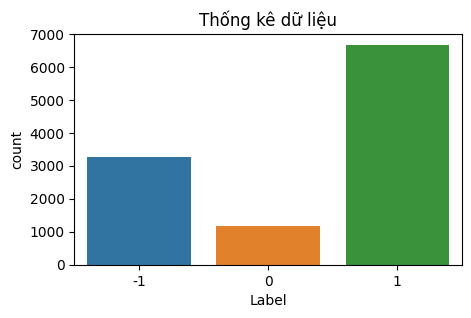

In [47]:
plt.figure(figsize=(5,3))
sb.countplot(data=data, x="Label").set_title('Thống kê dữ liệu')
plt.show()

In [50]:
data["Label"].value_counts()

 1    6677
-1    3268
 0    1182
Name: Label, dtype: int64

In [48]:
df_len_comment = data["Preprocess_Review"].apply(lambda text: sentence_len(text))
print('Độ dài trung bình của bình luận trong bộ dữ liệu:', int(np.mean(df_len_headline)), 'từ')

Độ dài trung bình của bình luận trong bộ dữ liệu: 69 từ


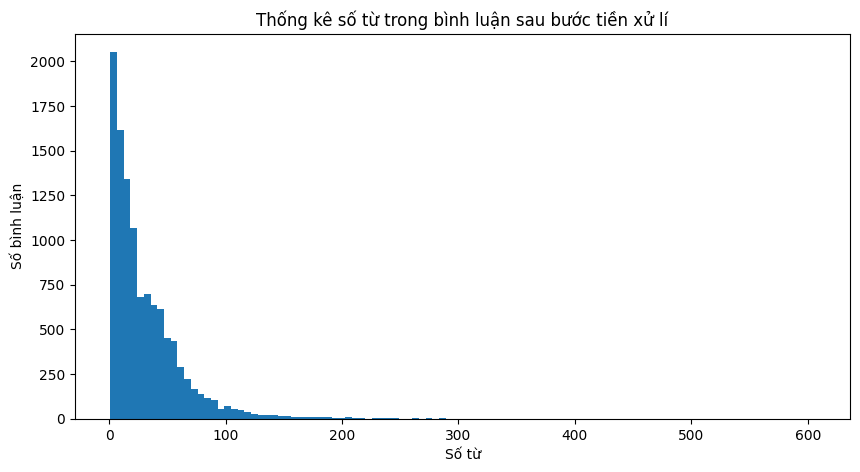

In [49]:
plt.figure(figsize=(10, 5))
plt.title("Thống kê số từ trong bình luận sau bước tiền xử lí")
plt.xlabel('Số từ')
plt.ylabel('Số bình luận')
plt.hist(np.array(df_len_comment), bins=int(math.sqrt(len(df_len_comment))));